week2 data glacier, vamsi 

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# Importing Cab Data and finding the profit

In [8]:
cab=pd.read_csv('C:/Users/Oruga.OVAMSI.001/Desktop/DataGlacier/Cab_Data.csv')
cab['profit']=cab['Price Charged']-cab['Cost of Trip']
cab

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,profit
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,27.5680
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,25.7980
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,16.8440
...,...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,5.8800
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,6.9020
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,87.4200
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,32.1420


In [9]:
cab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
 7   profit          359392 non-null  float64
dtypes: float64(4), int64(2), object(2)
memory usage: 21.9+ MB


In [10]:
cab.dtypes

Transaction ID      int64
Date of Travel      int64
Company            object
City               object
KM Travelled      float64
Price Charged     float64
Cost of Trip      float64
profit            float64
dtype: object

In [11]:
# change the type of Date of Travel datatype into DateTime 
a = cab['Date of Travel'].to_list()
base_date = pd.Timestamp('1899-12-29')
dates = [base_date + pd.DateOffset(date_offset) for date_offset in a]
cab['Date of Travel'] = pd.to_datetime(dates, format='%y/%m/%d')

In [12]:
cab.describe()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip,profit
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,22.567254,423.443311,286.190113,137.253198
std,1.268058e+05,12.233526,274.378911,157.993661,160.311840
min,1.000001e+07,1.900000,15.600000,19.000000,-220.060000
25%,1.011081e+07,12.000000,206.437500,151.200000,28.012000
50%,1.022104e+07,22.440000,386.360000,282.480000,81.962000
75%,1.033094e+07,32.960000,583.660000,413.683200,190.030000
max,1.044011e+07,48.000000,2048.030000,691.200000,1463.966000


In [13]:
cab['City'].unique()

array(['ATLANTA GA', 'AUSTIN TX', 'BOSTON MA', 'CHICAGO IL', 'DALLAS TX',
       'DENVER CO', 'LOS ANGELES CA', 'MIAMI FL', 'NASHVILLE TN',
       'NEW YORK NY', 'ORANGE COUNTY', 'PHOENIX AZ', 'PITTSBURGH PA',
       'SACRAMENTO CA', 'SAN DIEGO CA', 'SEATTLE WA', 'SILICON VALLEY',
       'TUCSON AZ', 'WASHINGTON DC'], dtype=object)

In [14]:
s=cab['profit'].sum()
s


49327701.491799995

# Import City Data

In [15]:
city=pd.read_csv('C:/Users/Oruga.OVAMSI.001/Desktop/DataGlacier/City.csv')
city

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"
5,ORANGE COUNTY,"1,030,185","12,994"
6,SAN DIEGO CA,"959,307","69,995"
7,PHOENIX AZ,"943,999","6,133"
8,DALLAS TX,"942,908","22,157"
9,ATLANTA GA,"814,885","24,701"


In [16]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [17]:
# Attribute 'Population' should be an integer
city['Population'] = [x.replace(',','') for x in city['Population']]
city['Population'] = city['Population'].astype(float)

# Attribute 'Users' should be an integer
city['Users'] = [x.replace(',','') for x in city['Users']]
city['Users'] = city['Users'].astype(float)

# Now check the type
city.dtypes

City           object
Population    float64
Users         float64
dtype: object

In [18]:
city.describe()

,Population,Users
count,2.000000e+01,20.000000
mean,1.231592e+06,64520.650000
std,1.740127e+06,83499.375289
min,2.489680e+05,3643.000000
25%,6.086372e+05,11633.250000
50%,7.845590e+05,23429.000000
75%,1.067041e+06,91766.000000
max,8.405837e+06,302149.000000


# Import customer ID data

In [19]:
cust=pd.read_csv('C:/Users/Oruga.OVAMSI.001/Desktop/DataGlacier/Customer_ID.csv')
cust

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536
...,...,...,...,...
49166,12490,Male,33,18713
49167,14971,Male,30,15346
49168,41414,Male,38,3960
49169,41677,Male,23,19454


In [20]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [21]:
cust.describe( include = 'all')

,Customer ID,Gender,Age,Income (USD/Month)
count,49171.000000,49171,49171.000000,49171.000000
unique,NaN,2,NaN,NaN
top,NaN,Male,NaN,NaN
freq,NaN,26562,NaN,NaN
mean,28398.252283,NaN,35.363121,15015.631856
std,17714.137333,NaN,12.599066,8002.208253
min,1.000000,NaN,18.000000,2000.000000
25%,12654.500000,NaN,25.000000,8289.500000
50%,27631.000000,NaN,33.000000,14656.000000
75%,43284.500000,NaN,42.000000,21035.000000


# Import transaction ID 

In [22]:
transaction_id=pd.read_csv('C:/Users/Oruga.OVAMSI.001/Desktop/DataGlacier/Transaction_ID.csv')
transaction_id

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card
...,...,...,...
440093,10440104,53286,Cash
440094,10440105,52265,Cash
440095,10440106,52175,Card
440096,10440107,52917,Card


In [23]:
transaction_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [24]:
transaction_id.describe(include = 'all', datetime_is_numeric=True)


,Transaction ID,Customer ID,Payment_Mode
count,4.400980e+05,440098.000000,440098
unique,NaN,NaN,2
top,NaN,NaN,Card
freq,NaN,NaN,263991
mean,1.022006e+07,23619.513120,NaN
std,1.270455e+05,21195.549816,NaN
min,1.000001e+07,1.000000,NaN
25%,1.011004e+07,3530.000000,NaN
50%,1.022006e+07,15168.000000,NaN
75%,1.033008e+07,43884.000000,NaN


# Merge and Visualize the data 

In [25]:
df= cab.merge(transaction_id, on= 'Transaction ID').merge(cust, on ='Customer ID').merge(city, on = 'City')
df.head(4)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,profit,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150,29290,Card,Male,28,10813,814885.0,24701.0
1,10351127,2018-07-20,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,281.2772,29290,Cash,Male,28,10813,814885.0,24701.0
2,10412921,2018-11-22,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,194.6480,29290,Card,Male,28,10813,814885.0,24701.0
3,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660,27703,Card,Male,27,9237,814885.0,24701.0


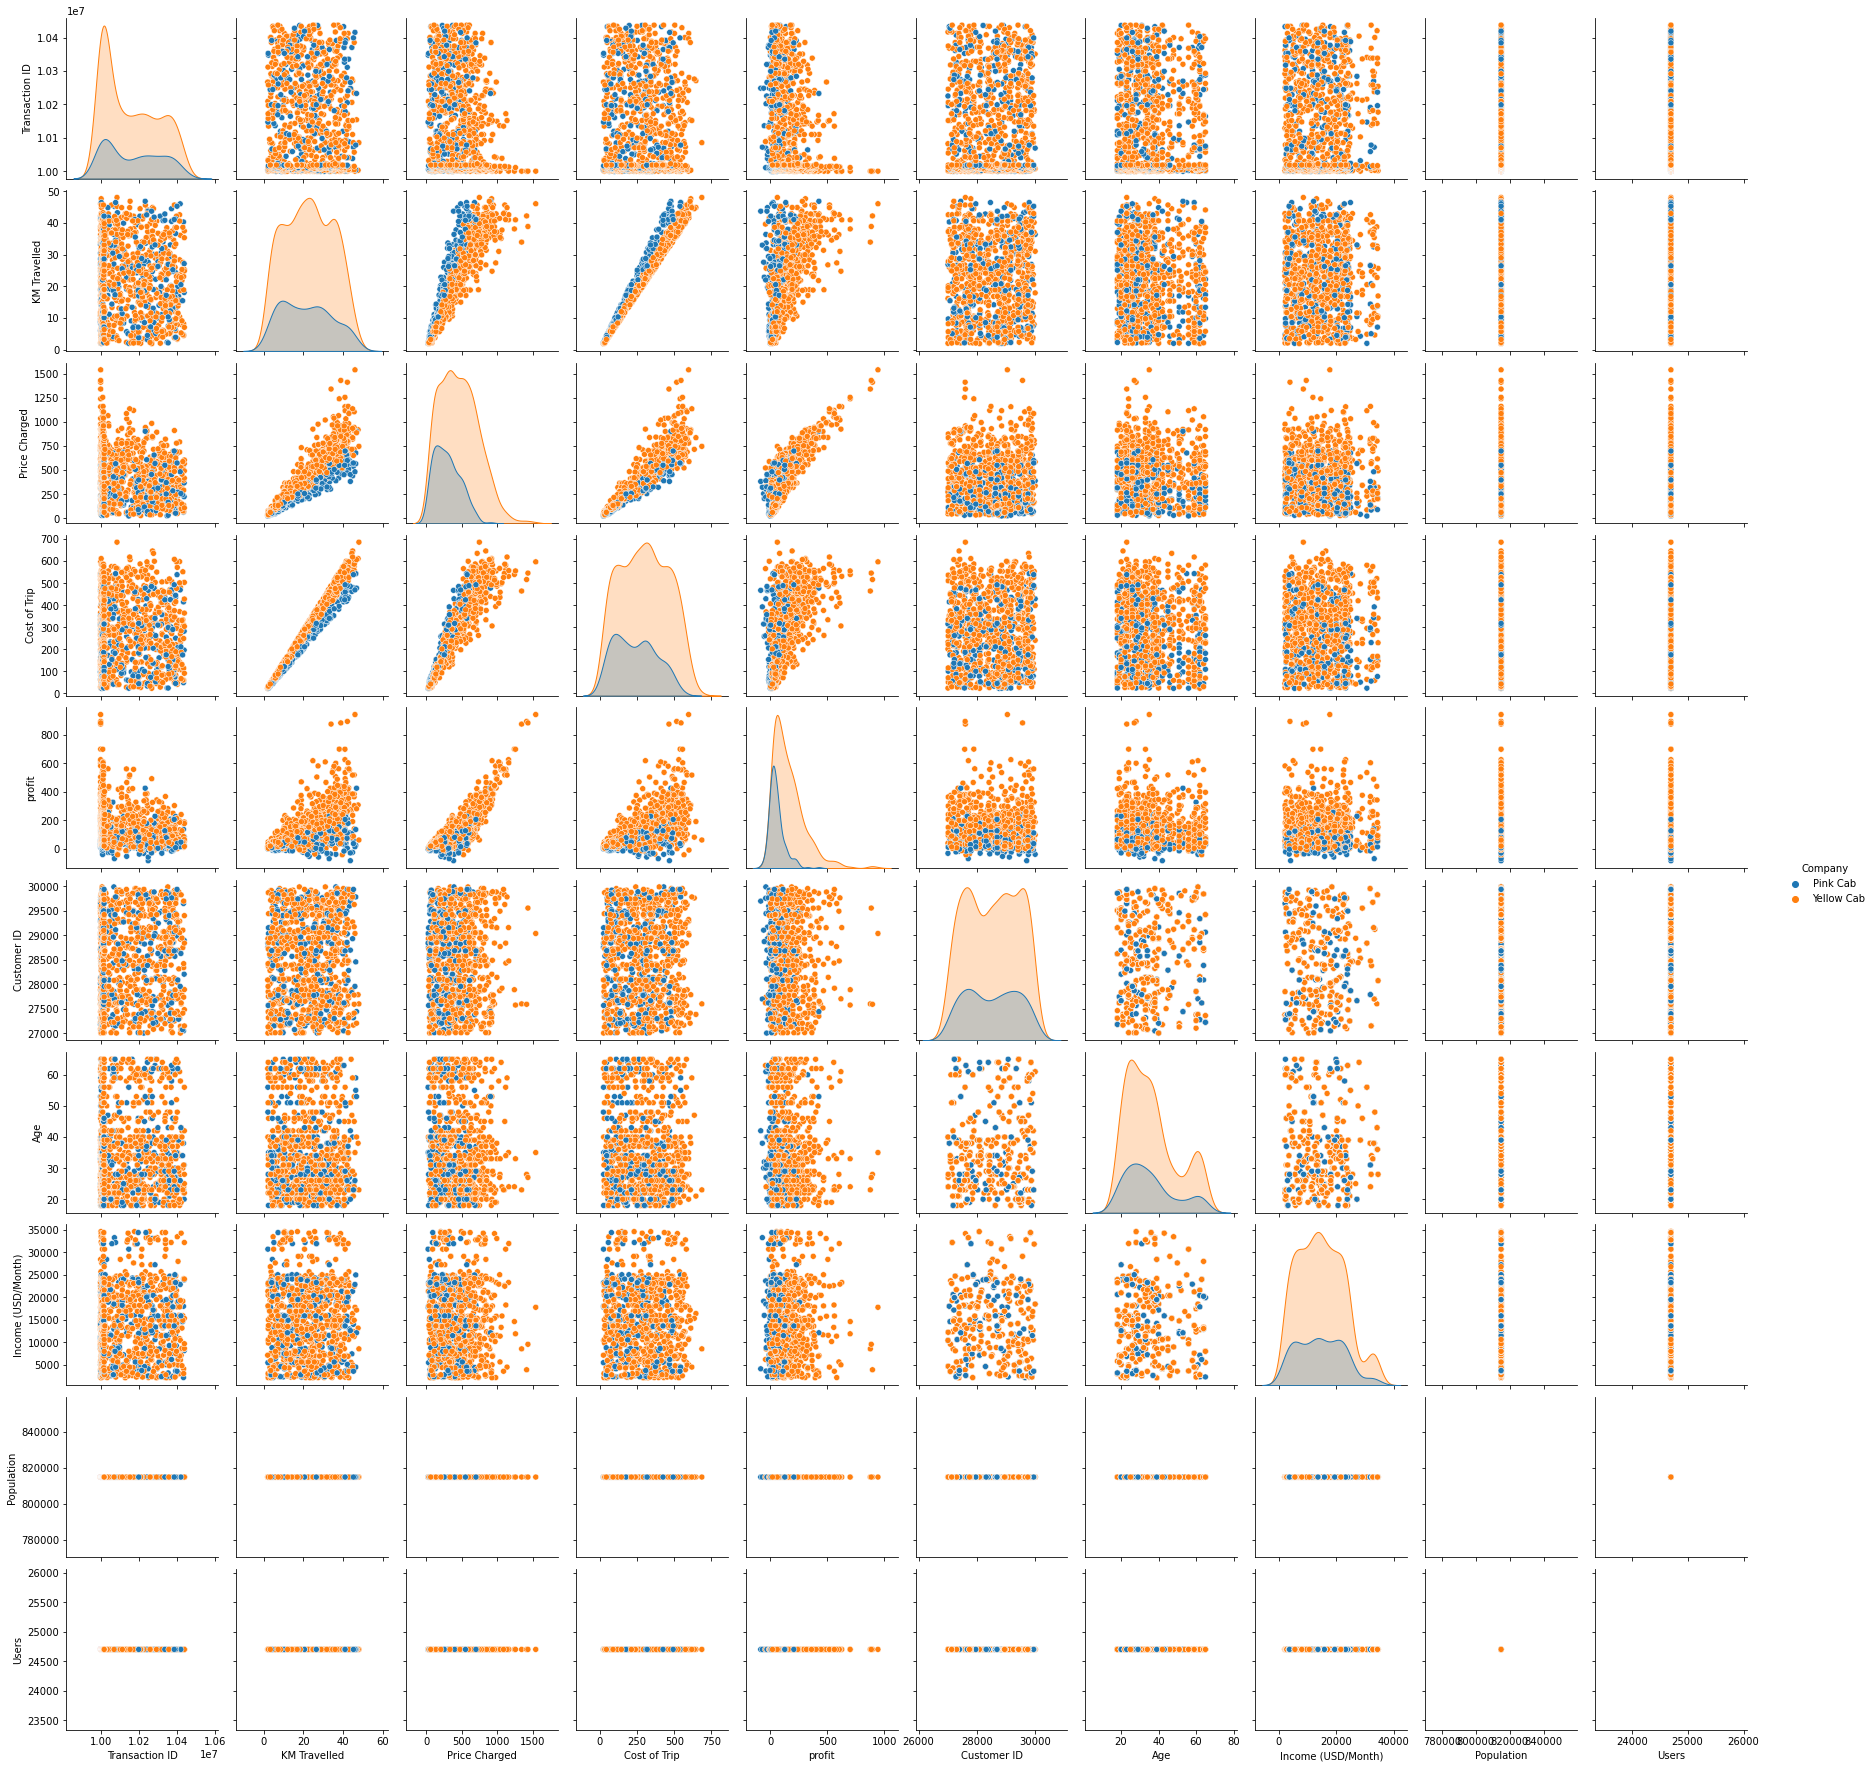

In [26]:
sns.pairplot(df.head(1000), hue = 'Company')

Date of Travel
2016-01-01     50105.0622
2016-01-02     49070.1108
2016-01-03      4078.7922
2016-01-04     12083.4746
2016-01-05     21000.4274
                 ...     
2018-12-26     32356.7824
2018-12-27    118890.3156
2018-12-28    118214.0754
2018-12-29     23593.1276
2018-12-30     22231.7628
Name: profit, Length: 1095, dtype: float64


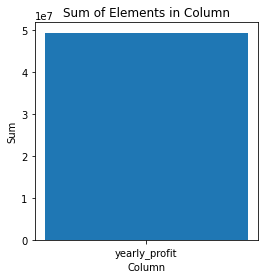

In [27]:
yearly_profit = df.groupby('Date of Travel')['profit'].sum()
plt.figure(figsize = (4,4))

# Print the year and profit
print(yearly_profit)

plt.bar(['yearly_profit'], [s])
# Add labels and title
plt.xlabel('Column')
plt.ylabel('Sum')
plt.title('Sum of Elements in Column')

# Show the chart
plt.show()


# Co rrelation 

In [28]:
data_corr = df.corr()
data_corr

,Transaction ID,KM Travelled,Price Charged,Cost of Trip,profit,Customer ID,Age,Income (USD/Month),Population,Users
Transaction ID,1.000000,-0.001429,-0.052902,-0.003462,-0.087130,-0.016912,-0.001267,-0.001570,0.023868,0.013526
KM Travelled,-0.001429,1.000000,0.835753,0.981848,0.462768,0.000389,-0.000369,-0.000544,-0.002311,-0.000428
Price Charged,-0.052902,0.835753,1.000000,0.859812,0.864154,-0.177324,-0.003084,0.003228,0.326589,0.281061
Cost of Trip,-0.003462,0.981848,0.859812,1.000000,0.486056,0.003077,-0.000189,-0.000633,0.015108,0.023628
profit,-0.087130,0.462768,0.864154,0.486056,1.000000,-0.306527,-0.005093,0.006148,0.544079,0.457758
Customer ID,-0.016912,0.000389,-0.177324,0.003077,-0.306527,1.000000,-0.004735,-0.013608,-0.647052,-0.610742
Age,-0.001267,-0.000369,-0.003084,-0.000189,-0.005093,-0.004735,1.000000,0.003907,-0.009002,-0.005906
Income (USD/Month),-0.001570,-0.000544,0.003228,-0.000633,0.006148,-0.013608,0.003907,1.000000,0.011868,0.010464
Population,0.023868,-0.002311,0.326589,0.015108,0.544079,-0.647052,-0.009002,0.011868,1.000000,0.915490
Users,0.013526,-0.000428,0.281061,0.023628,0.457758,-0.610742,-0.005906,0.010464,0.915490,1.000000


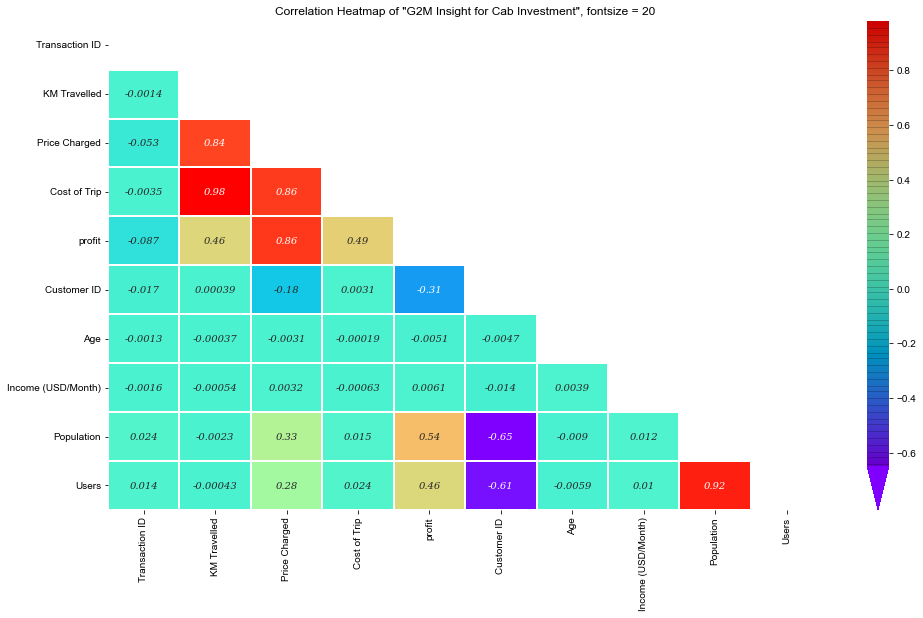

In [29]:
# Define the figure size
plt.figure(figsize = (16, 9))

# Cutomize the annot
annot_kws={'fontsize':10,                      # To change the size of the font
           'fontstyle':'italic',               # To change the style of font 
           'fontfamily': 'serif',              # To change the family of font 
           'alpha':1 }                         # To change the transparency of the text  


# Customize the cbar
cbar_kws = {"shrink":1,                        # To change the size of the color bar
            'extend':'min',                    # To change the end of the color bar like pointed
            'extendfrac':0.1,                  # To adjust the extension of the color bar
            "drawedges":True,                  # To draw lines (edges) on the color bar
           }

# take upper correlation matrix
matrix = np.triu(data_corr)

# Generate heatmap correlation
ax = sns.heatmap(data_corr, mask = matrix, cmap = 'rainbow', annot = True, linewidth = 1.5 ,annot_kws= annot_kws, cbar_kws=cbar_kws)

# Set the title etc
plt.title('Correlation Heatmap of "G2M Insight for Cab Investment", fontsize = 20')

# Set the size of text
sns.set(font_scale = 1.2)

# user travel

In [30]:
user=df.groupby('Company')
avg_user = user.Users.mean()
index = avg_user.index
value = avg_user.values 

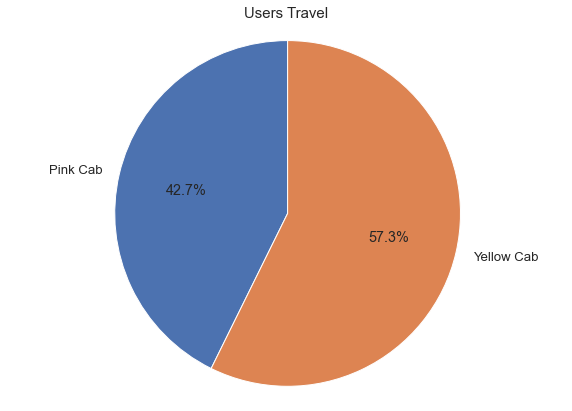

In [31]:
figp, axp = plt.subplots(figsize=(10,7))
axp.pie(value , labels=index, autopct='%1.1f%%', startangle=90,)
axp.axis('equal')

plt.title('Users Travel', fontsize = 15)
plt.show()

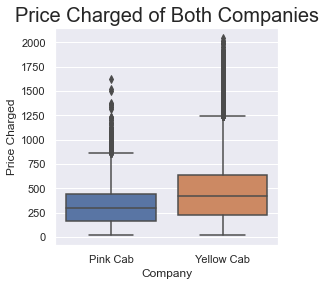

In [32]:
sns.set(style = 'darkgrid')

plt.figure(figsize = (4,4))

sns.boxplot(df['Company'], df['Price Charged'])
plt.title('Price Charged of Both Companies', fontsize=20)
plt.show()

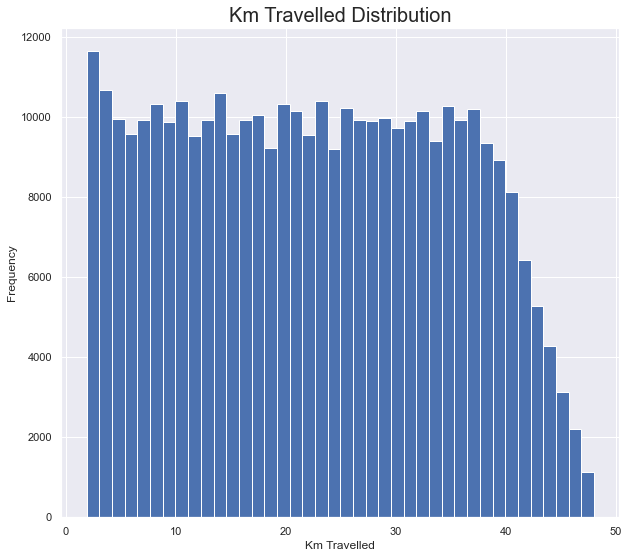

In [33]:
plt.figure(figsize = (10, 9))
plt.hist(df['KM Travelled'], bins = 40)
plt.title('Km Travelled Distribution', fontsize=20)
plt.ylabel('Frequency')
plt.xlabel('Km Travelled')
plt.show()

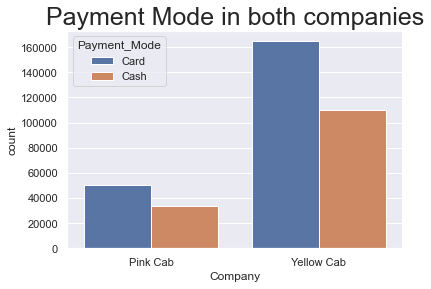

In [34]:
plt.figure(figsize = (6,4))
ax = sns.countplot(x="Company", hue="Payment_Mode", data=df)
plt.title('Payment Mode in both companies', fontsize=25)
plt.show()

In [35]:
gender_cab=df.groupby(['Company','Gender'])
gender_cab  = gender_cab['Customer ID'].nunique()
print(gender_cab)

Company     Gender
Pink Cab    Female    14819
            Male      17511
Yellow Cab  Female    18394
            Male      21502
Name: Customer ID, dtype: int64


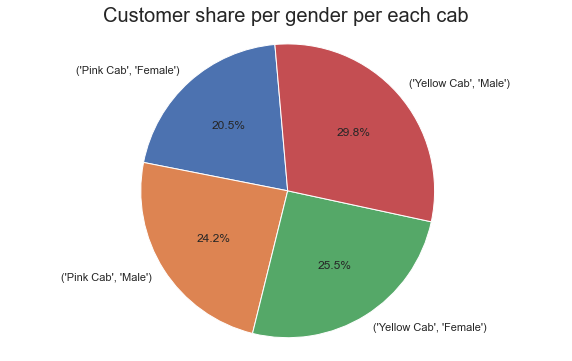

In [36]:
labs = gender_cab.index
vals = gender_cab.values
figp, axp = plt.subplots(figsize=(10,6))
axp.pie(vals , labels=labs, autopct='%1.1f%%', startangle=95,)
axp.axis('equal')

plt.title('Customer share per gender per each cab', fontsize = 20)
plt.show()

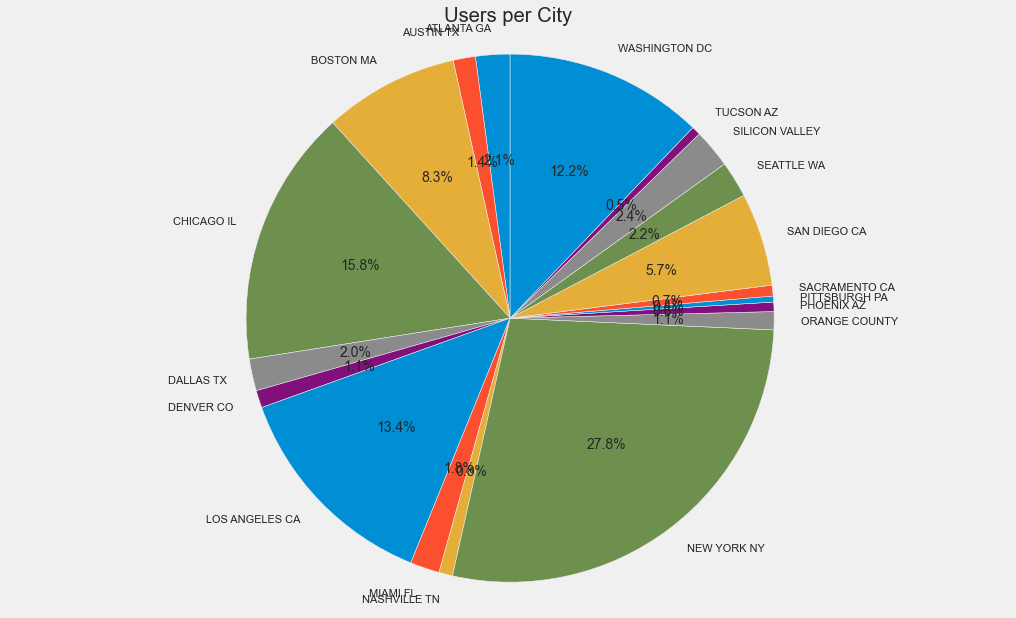

In [37]:
city_users = df.groupby('City')
city_users = city_users.Users.count()
labs = city_users.index
vals = city_users.values

plt.style.use('fivethirtyeight')
figp, axp = plt.subplots(figsize=(16,10))
axp.pie(vals , labels=labs, autopct='%1.1f%%', startangle=90,)
axp.axis('equal')
plt.title('Users per City')
plt.show()

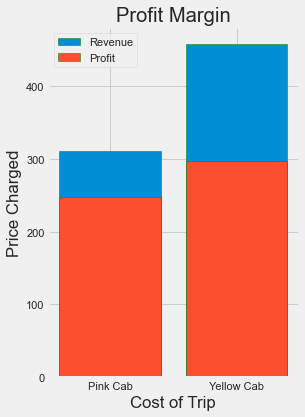

In [38]:
company = df.groupby('Company')
price_charged = company['Price Charged'].mean()
cost_trip = company['Cost of Trip'].mean()
c = cost_trip.index
c_v = cost_trip.values
c_p = price_charged.values
#########
plt.style.use('fivethirtyeight')
plt.figure(figsize = (4, 6))
plt.bar(c, c_p, edgecolor='green', label="Revenue")
plt.bar(c, c_v, edgecolor='green', label="Profit")
plt.title('Profit Margin')
plt.ylabel('Price Charged')
plt.xlabel('Cost of Trip')
plt.legend()
plt.show()

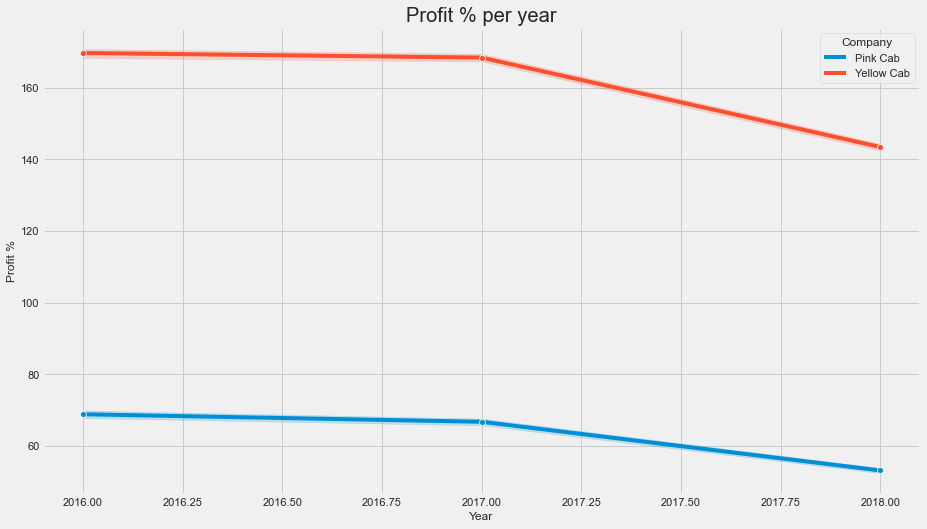

In [39]:
df['Year'] = df['Date of Travel'].dt.year
df['Month'] = df['Date of Travel'].dt.month
df['Day'] = df['Date of Travel'].dt.day
df['Profit'] = df['Price Charged'] - df['Cost of Trip']
###############
plt.figure(figsize = (14, 8))
sns.lineplot(x='Year', y='Profit', hue="Company", data=df, marker='o')
plt.xlabel("Year", size=12)
plt.ylabel("Profit %", size=12)
plt.title("Profit % per year")
plt.show()

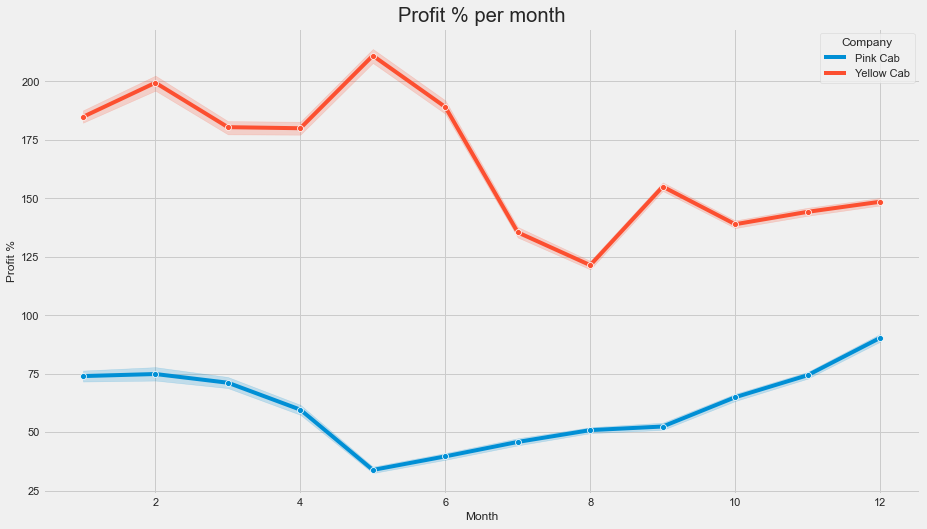

In [40]:
plt.figure(figsize = (14, 8))
sns.lineplot(x='Month', y='Profit', hue="Company", data=df, marker='o')
plt.xlabel("Month", size=12)
plt.ylabel("Profit %", size=12)
plt.title("Profit % per month")
plt.show()

In [41]:
urp = (city['Users'] /city['Population']) * 100 
city = city['City']

In [42]:
# Get the list of color
from random import randint

colors = []
n = 16

for i in range(n):
    colors.append('#%06X' % randint(0, 0xFFFFFF))

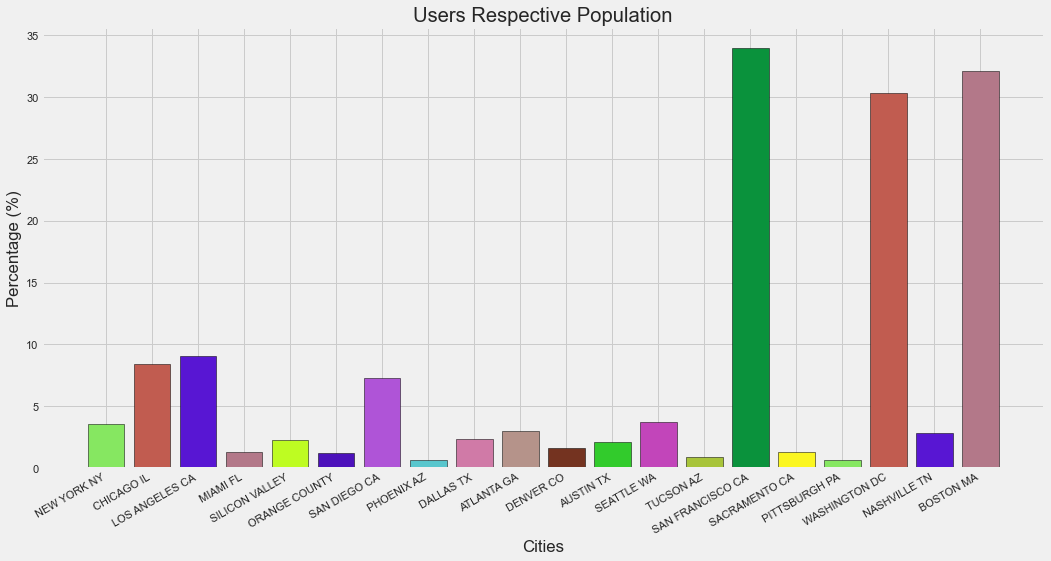

In [43]:
plt.figure(figsize = (16, 9))
plt.bar(city, urp, edgecolor='black', color = colors)
plt.gcf().autofmt_xdate()
plt.title('Users Respective Population')
plt.ylabel('Percentage (%)')
plt.xlabel('Cities')
plt.show()

Gender
Female    2.046195e+07
Male      2.886575e+07
Name: profit, dtype: float64


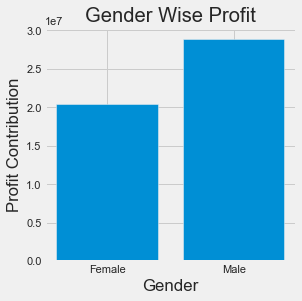

In [44]:
plt.figure(figsize = (4, 4))

# Group the data by gender and calculate the profit contribution
gender_profit = df.groupby('Gender')['profit'].sum()

# Print the profit contribution for each gender
print(gender_profit)

#############
gender_profit = df.groupby('Gender')['profit'].sum()

# Create a bar chart of the profit contribution by gender
plt.bar(gender_profit.index, gender_profit.values)

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Profit Contribution')
plt.title('Gender Wise Profit')

# Show the chart
plt.show()

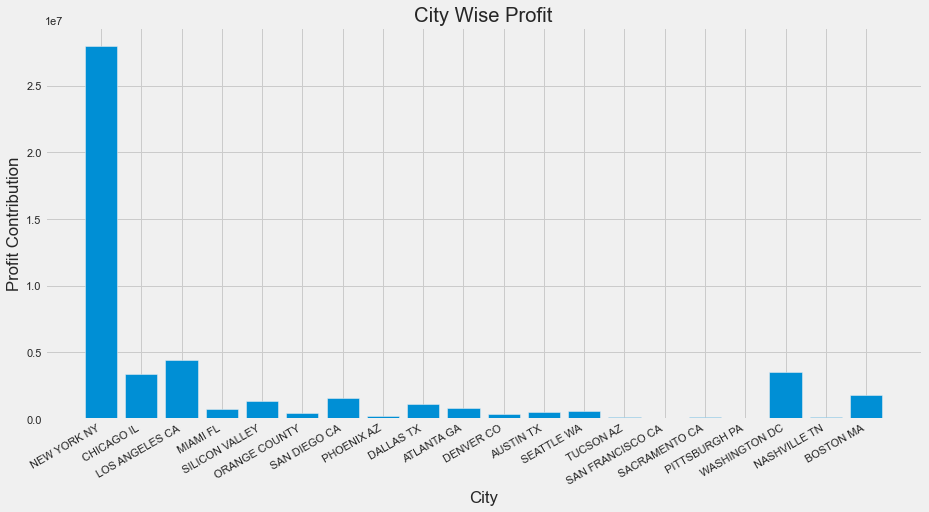

In [45]:
plt.figure(figsize = (14, 8))
plt.bar(city,urp, edgecolor='black', color = colors)
plt.gcf().autofmt_xdate()
#########
city_profit = df.groupby('City')['profit'].sum()

# Create a bar chart of the profit contribution by Company
plt.bar(city_profit.index, city_profit.values)
# Add labels and title
plt.xlabel('City')
plt.ylabel('Profit Contribution')
plt.title('City Wise Profit')

# Show the chart
plt.show()

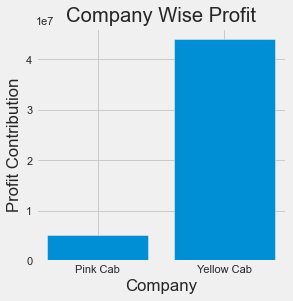

In [46]:

company_profit = df.groupby('Company')['profit'].sum()
plt.figure(figsize = (4,4))

# Create a bar chart of the profit contribution by Company
plt.bar(company_profit.index, company_profit.values)

# Add labels and title
plt.xlabel('Company')
plt.ylabel('Profit Contribution')
plt.title('Company Wise Profit')

# Show the chart
plt.show()

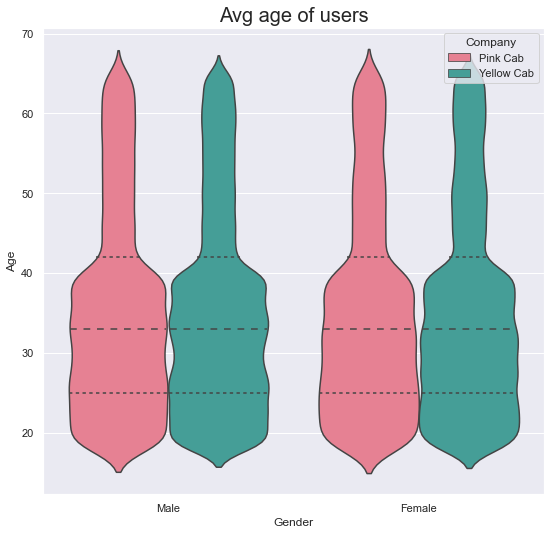

In [47]:
sns.set(style = 'darkgrid') 

plt.figure(figsize = (8,8))

sns.violinplot(df['Gender'], df['Age'], hue = df['Company'], palette = 'husl', inner = 'quartiles')
plt.title('Avg age of users', fontsize=20)
plt.show()

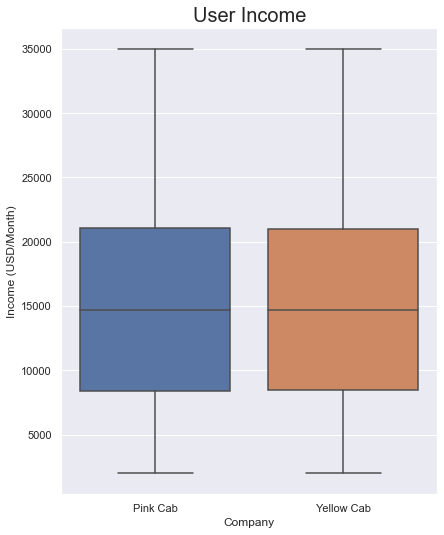

In [48]:
sns.set(style = 'darkgrid')

plt.figure(figsize = (6,8))

sns.boxplot(df['Company'], df['Income (USD/Month)'])
plt.title('User Income', fontsize=20)
plt.show()

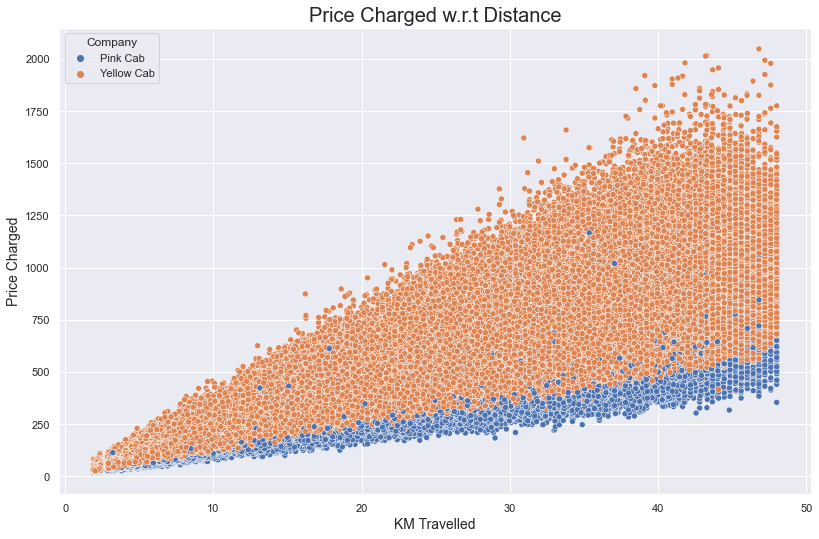

In [49]:
plt.figure(figsize = (12,8))

sns.scatterplot(data=df, x="KM Travelled", y='Price Charged', hue='Company')
plt.title('Price Charged w.r.t Distance',fontsize = 20)
plt.ylabel('Price Charged',fontsize = 14)
plt.xlabel('KM Travelled',fontsize = 14)
plt.show()

# Create Multiple Hypothesis and Investigate


###  Is there any difference in profit regarding Gender
Null : There is no difference regarding Gender in both cab companies.

Alt : There is difference regarding Gender in both cab companies.


In [56]:
#PINK_CAB

a = df[(df.Gender=='Male')&(df.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()
b = df[(df.Gender=='Female')&(df.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()
print(a.shape[0],b.shape[0])

_, p_value = stats.ttest_ind(a.values,b.values,equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('We accept alternative hypothesis (Alt)')
else:
    print('We accept null hypothesis (Null)')

47231 37480
P value is  0.11515305900425798
We accept null hypothesis (Null)


In [57]:
#Yellow cab
a = df[(df.Gender=='Male')&(df.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()
b = df[(df.Gender=='Female')&(df.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()
print(a.shape[0],b.shape[0])

_, p_value = stats.ttest_ind(a.values,b.values,equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('We accept alternative hypothesis (Alt)')
else:
    print('We accept null hypothesis (Null)')

158681 116000
P value is  6.060473042494144e-25
We accept alternative hypothesis (Alt)


# Is there any difference in Profit regarding Age
Null : There is no difference regarding Age in both cab companies.

Alt : There is difference regarding Age in both cab companies.

In [58]:
#pink cab
a = df[(df.Age <= 60)&(df.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()
b = df[(df.Age >= 60)&(df.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()
print(a.shape[0],b.shape[0])

_, p_value = stats.ttest_ind(a.values,b.values,equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('We accept alternative hypothesis (alt)')
else:
    print('We accept null hypothesis (Null)')

80125 5429
P value is  0.4816748536155635
We accept null hypothesis (Null)


In [59]:
#yellow cab
a = df[(df.Age <= 60)&(df.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()
b = df[(df.Age >= 60)&(df.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()
print(a.shape[0],b.shape[0])

_, p_value = stats.ttest_ind(a.values,b.values,equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('We accept alternative hypothesis (Alt)')
else:
    print('We accept null hypothesis (Null)')

260356 17257
P value is  6.328485471267631e-05
We accept alternative hypothesis (Alt)


# Is there any difference in Profit regarding Payment mode
Null : There is no difference regarding Payment_Mode in both cab companies.

Alt : There is difference regarding Payment_Mode in both cab companies..

In [60]:
#Pink cab
a = df[(df['Payment_Mode']=='Cash')&(df.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()
b = df[(df['Payment_Mode']=='Card')&(df.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()

_, p_value = stats.ttest_ind(a.values,b.values,equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('We accept alternative hypothesis (Alt)')
else:
    print('We accept null hypothesis (Null)')

P value is  0.7900465828793288
We accept null hypothesis (Null)


In [61]:
#yellow cab
a = df[(df['Payment_Mode']=='Cash')&(df.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()
b = df[(df['Payment_Mode']=='Card')&(df.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()

_, p_value = stats.ttest_ind(a.values,b.values,equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('We accept alternative hypothesis (Alt)')
else:
    print('We accept null hypothesis (Null)')

P value is  0.2933060638298729
We accept null hypothesis (Null)
